### Packages

In [11]:
# Packages
import h5py    
import numpy as np    
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.optimize import curve_fit as fit
import func as func

# Directory with data:
datadir = "output/"

# To quit warnings for showing up in cell outputs:
import warnings
warnings.filterwarnings('ignore')

### Importing data from Gadget output
In this cell we import the DM data from the Gadget simulation output, plotting it to differenciate both galaxies and split them into two positional vectors. With this information we can then make a density profile for both and fit the NFW profile.

In [ ]:
#Importing data (Particle Type 1 - dark matter, Particle Type 2 - baryonic matter):
f = h5py.File(datadir+"snapshot_000.hdf5", "r")
group = f["PartType1"]

    #Checkout what keys are inside that group.
for key in group.keys():
    print(key)
    
data = group["Coordinates"][()]

#Plotting the initial conditions of both galaxies:
plt.figure(dpi=150)
plt.plot(data[:,0],data[:,1],'k.',ms=1)

#Splitting the coordinate vector for both galaxies:
gal1x,gal1y,gal1z,gal2x,gal2y,gal2z = [],[],[],[],[],[]
for i in range(0,(len(data[:,0])-1)):
    if (data[i,0]>0):
        gal1x.append(data[i,0])
        gal1y.append(data[i,1])
        gal1z.append(data[i,2])
    if (data[i,0]<0):
        gal2x.append(data[i,0])
        gal2y.append(data[i,1])
        gal2z.append(data[i,2])
        
gal1coords=[gal1x,gal1y,gal1z]
gal2coords=[gal2x,gal2y,gal2z]

#Plotting both galaxies separately just in case:
plt.figure(dpi=150)
plt.plot(gal1coords[0],gal1coords[1],'k.',ms=1)
plt.plot(gal2coords[0],gal2coords[1],'r.',ms=1)

#Looking for the center of each galaxy and plot checking:
gal1cen = [np.median(gal1x),np.median(gal1y),np.median(gal1z)]
gal2cen = [np.median(gal2x),np.median(gal2y),np.median(gal2z)]

plt.plot(gal1cen[0],gal1cen[1],'bo',ms=3)
plt.plot(gal2cen[0],gal2cen[1],'bo',ms=3)

    #Particle masses for each galaxy (assuming MW mass 10^12 Msol):
mp1=(10**12)/(len(gal1coords[0]))                                   #keep in mind this are not real particles, are huge groups of "real particles".
mp2=(10**12)/(len(gal2coords[0]))

#Centering coordinates to have the center of each galaxy in 0,0,0:

gal1coords=np.array(gal1coords) - np.resize(np.array(gal1cen),(3,1))
gal2coords=np.,galy,galzarray(gal2coords) - np.resize(np.array(gal2cen),(3,1))

plt.figure(dpi=150)
plt.plot(gal1coords[0],gal1coords[1],'k.',ms=1,label='Galaxy 1')
plt.plot(gal2coords[0],gal2coords[1],'r.',ms=1,label='Galaxy 2')
plt.legend()


#Calculating radial distance to center of the galaxy for each particle:
gal1dist = []
gal2dist = []

for i in range(0,(len(gal1coords[0])-1)):
    d=np.sqrt((gal1coords[0,i]**2)+(gal1coords[1,i]**2)+(gal1coords[2,i]**2))
    gal1dist.append(d)
for i in range(0,(len(gal2coords[0])-1)):
    d=np.sqrt((gal2coords[0,i]**2)+(gal2coords[1,i]**2)+(gal2coords[2,i]**2))
    gal2dist.append(d)

#After you are done
f.close()

### Density profile
Now that we have the data splitted into the two galaxies we can make the density profiles by making a for loop run for different radial bins and counter the number of particles for each bin. THen we will divide this particle number by the volume of the shell containing them and multiply by the particle mass, which is basically the mass of the galaxy (approximated to the MIlky Way mass 10^12 Msol) divided by the number of particles, which is the length of the positional vector. Once we have the number of particles at different radial distances we can then plot this relation with a logarithm to have our final profile.

In [ ]:
# As we see, density is not well presented because for same radius bins the variation in volume is not constant.
# We have to make sure each new bin we take holds the same volume as the bin before. To do this we will define
# an initial volume Vbin and replicate it for each bin. We will choose a distance of 1 to the center for it.

R1max=np.amax(gal1dist)
R2max=np.amax(gal2dist)



#GALAXY 1:
prof1=[],[]                  # Profile vector with two components, radial distance and mass at this distance.
Rbin=1
Rins=1

for n in range(2,100):
    R1=Rins
    if (R1>R1max):
        break
    R2=n*Rbin
    Npart=0
    for i in range(0,len(gal1dist)):            # Loop that checks for parwticles between both radius and counts them.
        if (gal1dist[i]>R1 and gal1dist[i]<R2):
            Npart+=1
    dens1=Npart/(1.25*pi*(R2**3-R1**3))
    prof1[0].append(R1)
    prof1[1].append(dens1*mp1)
    Rins=R2

logprof1=np.log10(prof1)    


    
#GALAXY 2:
prof2=[],[]                  # Profile vector with two components, radial distance and mass at this distance.
Rbin=1
Rins=1

for n in range(2,100):
    R1=Rins
    if (R1>R2max):
        break
    R2=n*Rbin
    Npart=0
    for i in range(0,len(gal2dist)):            # Loop that checks for parwticles between both radius and counts them.
        if (gal2dist[i]>R1 and gal2dist[i]<R2):
            Npart+=1
    dens2=Npart/(1.25*pi*(R2**3-R1**3))
    prof2[0].append(R1)
    prof2[1].append(dens2*mp2)
    Rins=R2

logprof2=np.log10(prof2)



#Plotting radial profiles:
plt.figure(dpi=150)
plt.plot(logprof1[0],logprof1[1],'k.',ms=1)

plt.figure(dpi=150)
plt.plot(logprof2[0],logprof2[1],'k.',ms=1)

### Profile fitting to NFW density profile
As we know, galaxy DM profiles tend to follow a Navarro-Frenk-White density profile, which relates density and radius as:

$$
    \rho(r)= \frac{\rho_0}{\left(\frac{r}{r_s}\right)\cdot \left(1+\frac{r}{r_s}\right)^2}
$$

So, we will basically define this profile depending on the scale variables $\rho_0$ and $r_s$ in a separate file named <tt>func.py</tt> and fit this profile to both density profiles using <tt>curve_fit</tt> module.

In [ ]:
#GALAXY 1:
init_guesses=[10**8,10]
r=10**logprof1[0]
popt,pcov=fit(func.logNFW,r,logprof1[1],[10**8,10])
#Plotting radial profile and fit:
plt.figure(dpi=150)
plt.plot(logprof1[0],logprof1[1],'k.',ms=1.5)
plt.plot(logprof1[0],func.logNFW(r,popt[0],popt[1]),'r-',alpha=0.5,linewidth=1)
print("GALAXY 1:\n"+"rho_0 = "+str(popt[0])+"\n"+"log(rho_0) = "+str(np.log10(popt[0]))+"\nr_s = "+str(popt[1])+"\n")



#GALAXY 2:
init_guesses=[10**8,10]
r=10**logprof2[0]
popt,pcov=fit(func.logNFW,r,logprof2[1],init_guesses)
#Plotting radial profile and fit:
plt.figure(dpi=150)
plt.plot(logprof2[0],logprof2[1],'k.',ms=1.5)
plt.plot(logprof2[0],func.logNFW(r,popt[0],popt[1]),'r-',alpha=0.5,linewidth=1)
print("GALAXY 2:\n"+"rho_0 = "+str(popt[0])+"\n"+"log(rho_0) = "+str(np.log10(popt[0]))+"\nr_s = "+str(popt[1]))


### Density profile of final snapshot:
Now we will make a longer simulation of the two collinding galaxies and will do the same process of the density profile and the NFW fitting.

MERGED GALAXY:
rho_0 = 23694562.24409562
log(rho_0) = 7.374648689539751
r_s = 11.376594451305229


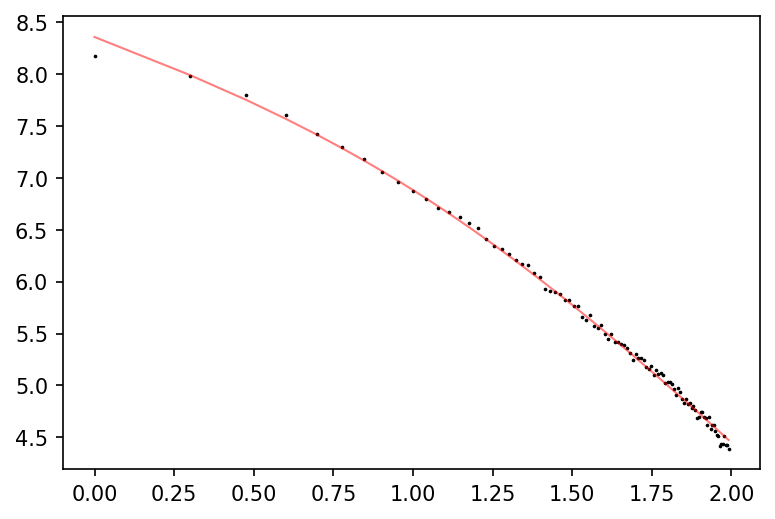

In [14]:
# Import data:
f = h5py.File(datadir+"snapshot_020.hdf5", "r")
group = f["PartType1"]
data = group["Coordinates"][()]



#SOme parameters:
galx,galy,galz=data[:,0],data[:,1],data[:,2]
galcen=[np.median(galx),np.median(galy),np.median(galz)]     # Galaxy center
mp=(10**12)/(len(galx))                                      # Particle mass
galcoords=[galx,galy,galz]



#Centering coordinates, radial distance to center and :
galcoords=np.array(galcoords) - np.resize(np.array(galcen),(3,1))
galdist = []
for i in range(len(galcoords[0])):
    d=np.sqrt((galcoords[0,i]**2)+(galcoords[1,i]**2)+(galcoords[2,i]**2))
    galdist.append(d)

    
    
#Density profile:
prof=[],[] 
Rbin=1
Rins=1
Rmax=np.amax(galdist)

for n in range(2,100):
    R1=Rins
    if (R1>Rmax):
        break
    R2=n*Rbin
    Npart=0
    for i in range(len(galdist)):            # Loop that checks for parwticles between both radius and counts them.
        if (galdist[i]>R1 and galdist[i]<R2):
            Npart+=1
    dens=Npart/(1.25*pi*(R2**3-R1**3))
    prof[0].append(R1)
    prof[1].append(dens*mp)
    Rins=R2
logprof=np.log10(prof)



#Fitting to NFW:
init_guesses=[10**8.5,10]
r=10**logprof[0]
popt,pcov=fit(func.logNFW,r,logprof[1],[10**8,10])
#Plotting radial profile and fit:
plt.figure(dpi=150)
plt.plot(logprof[0],logprof[1],'k.',ms=1.5)
plt.plot(logprof[0],func.logNFW(r,popt[0],popt[1]),'r-',alpha=0.5,linewidth=1)
plt.savefig("merged_NFWfit.PNG")
print("MERGED GALAXY:\n"+"rho_0 = "+str(popt[0])+"\n"+"log(rho_0) = "+str(np.log10(popt[0]))+"\nr_s = "+str(popt[1]))